<a href="https://colab.research.google.com/github/AIPythonILP-teamB/AIPythonILP-teamB-Python/blob/tang/baseline_Multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize-matplotlib

In [ ]:
# 数値計算を行うライブラリ numpy をインポート
import numpy as np
# 表データを扱うライブラリ pandas をインポート
import pandas as pd
# 図や表を描画するためのライブラリをインポート
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [ ]:
#すべての列を表示
pd.set_option('display.max_columns', None)

In [ ]:
weather_df = pd.read_csv('weather_data_cleaned.csv')
sales_df = pd.read_csv('sales_data_cleaned.csv')

# データ結合
df = pd.merge(sales_df, weather_df, on='日付', how='left')

In [ ]:
df.head()

,日付,曜日_x,来客数,総杯数,売上合計(円),ペールエール(本),ペールエール(円),ラガー(本),ラガー(円),IPA(本),...,日照時間(時間),合計全天日射量(MJ/㎡),平均風速(m/s),最大風速(m/s),最大風速(m/s).1,平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm)
0,2024/4/1,月,16,25,25300,6,6000,5,4000,5,...,3.8,14.85,2.8,6.3,南東,11.9,73.0,53.0,6.0,0.0
1,2024/4/2,火,19,25,24600,6,6000,4,3200,5,...,10.6,22.30,3.0,6.1,南,8.2,50.0,27.0,5.0,0.0
2,2024/4/3,水,11,19,18500,5,5000,4,3200,3,...,0.0,4.58,1.6,3.9,南東,13.0,83.0,57.0,10.0,0.0
3,2024/4/4,木,6,10,9500,2,2000,2,1600,2,...,0.1,9.27,2.0,4.7,北西,13.6,79.0,51.0,10.0,0.0
4,2024/4/5,金,10,18,17100,3,3000,5,4000,3,...,0.0,2.97,2.8,4.9,北東,9.6,71.0,47.0,10.0,0.0


In [ ]:
df = df.drop('曜日_y', axis=1)

In [ ]:
df.shape

(314, 32)

In [ ]:
df.rename(columns={'曜日_x': '曜日'}, inplace=True)

In [ ]:
#欠損値が含まれる行の確認
missing_rows = df[df.isna().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [日付, 曜日, 来客数, 総杯数, 売上合計(円), ペールエール(本), ペールエール(円), ラガー(本), ラガー(円), IPA(本), IPA(円), ホワイトビール(本), ホワイトビール(円), 黒ビール(本), 黒ビール(円), フルーツビール(本), フルーツビール(円), 平均気温(℃), 最高気温(℃), 最低気温(℃), 降水量の合計(mm), 1時間降水量の最大(mm), 日照時間(時間), 合計全天日射量(MJ/㎡), 平均風速(m/s), 最大風速(m/s), 最大風速(m/s).1, 平均蒸気圧(hPa), 平均湿度(％), 最小相対湿度(％), 平均雲量(10分比), 降雪量合計(cm)]
Index: []

[0 rows x 32 columns]


In [ ]:
# 各種統計量の確認
df.describe()

,来客数,総杯数,売上合計(円),ペールエール(本),ペールエール(円),ラガー(本),ラガー(円),IPA(本),IPA(円),ホワイトビール(本),...,1時間降水量の最大(mm),日照時間(時間),合計全天日射量(MJ/㎡),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm)
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,...,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,13.124204,22.165605,21135.987261,5.015924,5015.923567,4.987261,3989.808917,3.570064,3213.057325,3.121019,...,1.945860,5.800955,13.909554,2.695860,5.748408,16.413376,68.863057,48.073248,6.224204,0.006369
std,5.437462,10.932174,10295.993722,2.579670,2579.670077,2.865432,2292.345499,1.882286,1694.056953,1.959169,...,5.240412,3.919391,6.840109,0.763556,1.584836,9.932012,16.317253,17.450735,3.385949,0.079681
min,2.000000,4.000000,4600.000000,1.000000,1000.000000,1.000000,800.000000,1.000000,900.000000,1.000000,...,0.000000,0.000000,1.520000,1.400000,2.700000,2.600000,31.000000,13.000000,0.000000,0.000000
25%,9.000000,14.000000,13500.000000,3.000000,3000.000000,3.000000,2400.000000,2.000000,1800.000000,2.000000,...,0.000000,1.800000,9.097500,2.125000,4.600000,6.650000,55.250000,35.000000,3.500000,0.000000
50%,13.000000,22.000000,20450.000000,5.000000,5000.000000,5.000000,4000.000000,3.000000,2700.000000,3.000000,...,0.000000,6.700000,12.795000,2.600000,5.500000,15.100000,72.000000,49.500000,7.000000,0.000000
75%,17.000000,28.000000,26800.000000,6.000000,6000.000000,6.000000,4800.000000,5.000000,4500.000000,4.000000,...,0.500000,8.900000,18.932500,3.000000,6.600000,25.850000,80.000000,59.000000,9.500000,0.000000
max,30.000000,66.000000,62900.000000,20.000000,20000.000000,17.000000,13600.000000,11.000000,9900.000000,14.000000,...,49.500000,13.300000,29.750000,5.700000,11.000000,34.200000,100.000000,96.000000,10.000000,1.000000


In [128]:
df['日付'] = pd.to_datetime(df['日付'], errors='coerce')

In [129]:
df.dtypes

,0
日付,datetime64[ns]
曜日,object
来客数,int64
総杯数,int64
売上合計(円),int64
ペールエール(本),int64
ペールエール(円),int64
ラガー(本),int64
ラガー(円),int64
IPA(本),int64


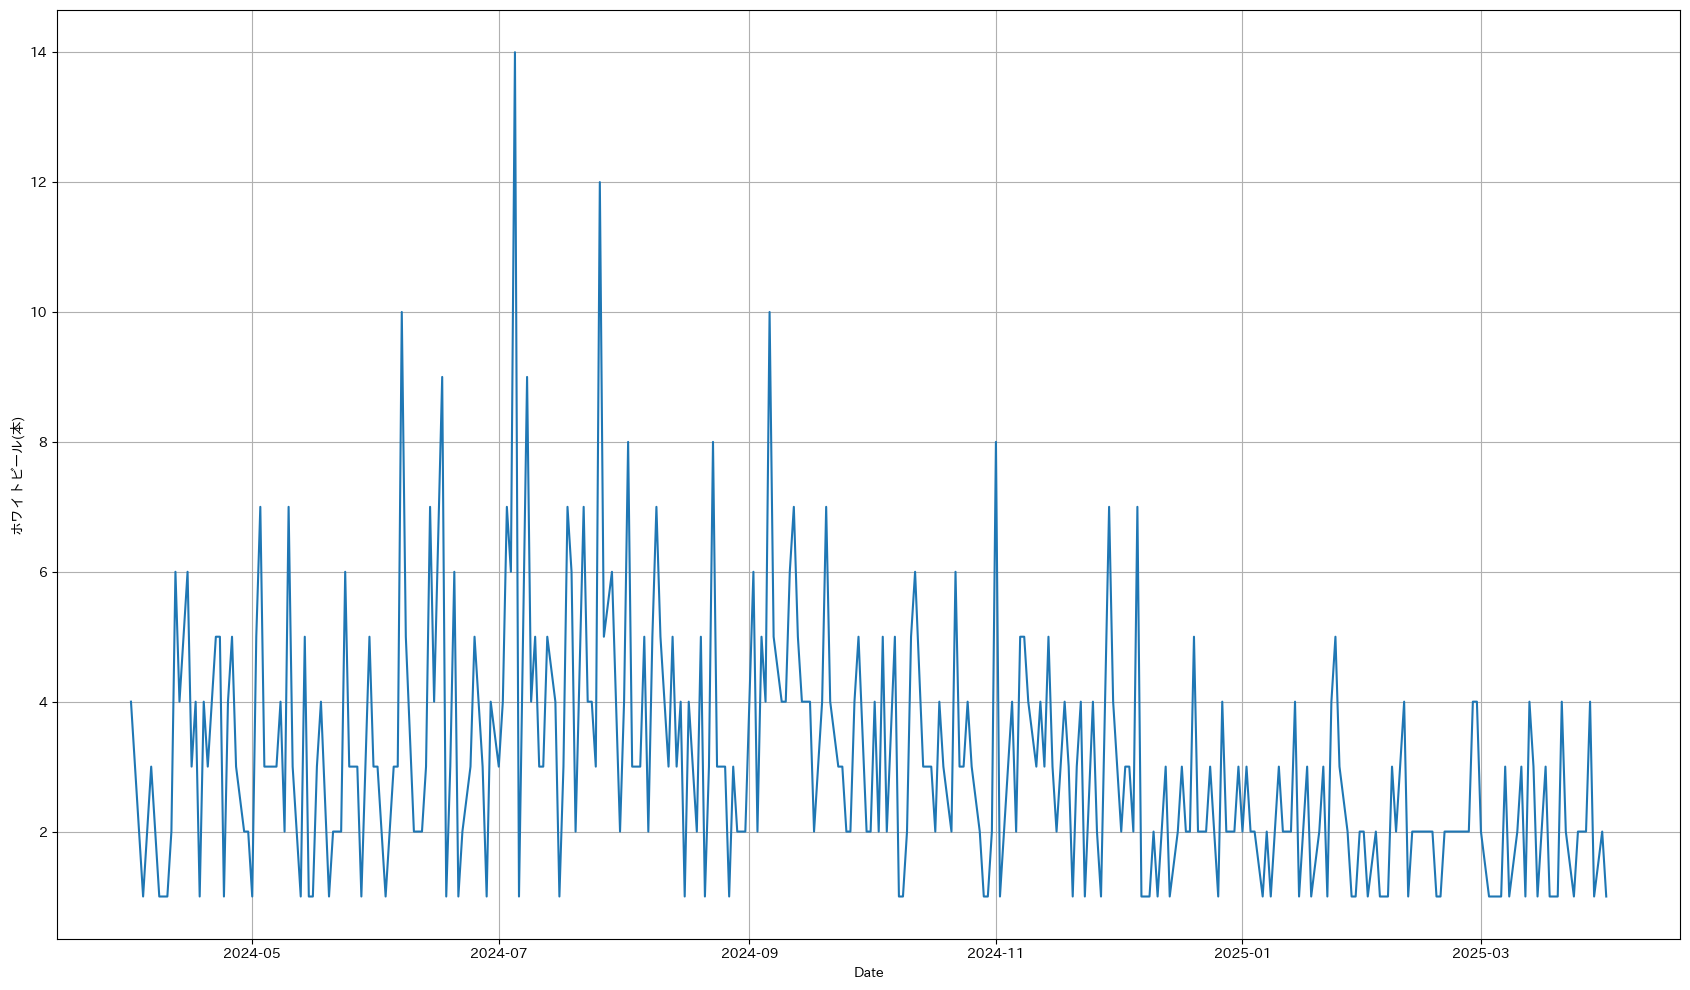

In [132]:
plt.figure(figsize=(17, 10))
plt.plot(df['日付'], df['ホワイトビール(本)'], linestyle='-')


plt.xlabel('Date')
plt.ylabel('ホワイトビール(本)')
#plt.title('每日利润折线图')
#plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X = pd.concat([df.iloc[:, 1], df.iloc[:, 17:]], axis=1)
X.head()

,曜日,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),合計全天日射量(MJ/㎡),平均風速(m/s),最大風速(m/s),最大風速(m/s).1,平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm)
0,月,14.6,19.7,11.8,3.0,2.5,3.8,14.85,2.8,6.3,南東,11.9,73.0,53.0,6.0,0.0
1,火,14.2,20.6,8.4,0.0,0.0,10.6,22.30,3.0,6.1,南,8.2,50.0,27.0,5.0,0.0
2,水,13.9,16.6,12.3,11.5,3.0,0.0,4.58,1.6,3.9,南東,13.0,83.0,57.0,10.0,0.0
3,木,15.4,19.9,11.3,4.0,3.5,0.1,9.27,2.0,4.7,北西,13.6,79.0,51.0,10.0,0.0
4,金,11.4,15.1,9.0,0.5,0.5,0.0,2.97,2.8,4.9,北東,9.6,71.0,47.0,10.0,0.0


In [ ]:
#売上合計を目的変数
y = df.iloc[:, 4]
y.head()

,売上合計(円)
0,25300
1,24600
2,18500
3,9500
4,17100


In [ ]:
X = pd.get_dummies(X, columns=[X.columns[0]], dtype=int)

In [ ]:
X = pd.get_dummies(X, columns=["最大風速(m/s).1"], dtype=int)

In [ ]:
X.head()

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),合計全天日射量(MJ/㎡),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm),曜日_土,曜日_月,曜日_木,曜日_水,曜日_火,曜日_金,最大風速(m/s).1_北,最大風速(m/s).1_北北東,最大風速(m/s).1_北北西,最大風速(m/s).1_北東,最大風速(m/s).1_北西,最大風速(m/s).1_南,最大風速(m/s).1_南南東,最大風速(m/s).1_南南西,最大風速(m/s).1_南東,最大風速(m/s).1_南西,最大風速(m/s).1_東,最大風速(m/s).1_東北東,最大風速(m/s).1_東南東,最大風速(m/s).1_西北西,最大風速(m/s).1_西南西
0,14.6,19.7,11.8,3.0,2.5,3.8,14.85,2.8,6.3,11.9,73.0,53.0,6.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,14.2,20.6,8.4,0.0,0.0,10.6,22.30,3.0,6.1,8.2,50.0,27.0,5.0,0.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,13.9,16.6,12.3,11.5,3.0,0.0,4.58,1.6,3.9,13.0,83.0,57.0,10.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,15.4,19.9,11.3,4.0,3.5,0.1,9.27,2.0,4.7,13.6,79.0,51.0,10.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,11.4,15.1,9.0,0.5,0.5,0.0,2.97,2.8,4.9,9.6,71.0,47.0,10.0,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.dtypes

,0
平均気温(℃),float64
最高気温(℃),float64
最低気温(℃),float64
降水量の合計(mm),float64
1時間降水量の最大(mm),float64
日照時間(時間),float64
合計全天日射量(MJ/㎡),float64
平均風速(m/s),float64
最大風速(m/s),float64
平均蒸気圧(hPa),float64


In [ ]:
# データセットを分割するための関数をインポート
from sklearn.model_selection import train_test_split

# データセットを「学習用データセット」と「テスト用データセット」に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.shape

(251, 35)

In [ ]:

X_train.head()

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),合計全天日射量(MJ/㎡),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm),曜日_土,曜日_月,曜日_木,曜日_水,曜日_火,曜日_金,最大風速(m/s).1_北,最大風速(m/s).1_北北東,最大風速(m/s).1_北北西,最大風速(m/s).1_北東,最大風速(m/s).1_北西,最大風速(m/s).1_南,最大風速(m/s).1_南南東,最大風速(m/s).1_南南西,最大風速(m/s).1_南東,最大風速(m/s).1_南西,最大風速(m/s).1_東,最大風速(m/s).1_東北東,最大風速(m/s).1_東南東,最大風速(m/s).1_西北西,最大風速(m/s).1_西南西
0,14.6,19.7,11.8,3.0,2.5,3.8,14.85,2.8,6.3,11.9,73.0,53.0,6.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
161,21.3,24.5,18.9,9.5,2.5,0.0,1.88,2.5,4.9,23.9,94.0,82.0,10.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
199,9.7,13.2,7.3,0.0,0.0,8.4,12.62,3.2,5.7,5.8,48.0,36.0,6.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
62,24.6,30.1,20.0,0.0,0.0,10.4,25.39,3.1,5.8,22.4,74.0,48.0,4.8,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
125,29.4,34.4,25.4,1.0,1.0,7.9,20.21,3.2,6.4,32.7,80.0,62.0,6.8,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
float_cols = X.select_dtypes(include='float64').columns

In [ ]:
print(float_cols)

Index(['平均気温(℃)', '最高気温(℃)', '最低気温(℃)', '降水量の合計(mm)', '1時間降水量の最大(mm)',
       '日照時間(時間)', '合計全天日射量(MJ/㎡)', '平均風速(m/s)', '最大風速(m/s)', '平均蒸気圧(hPa)',
       '平均湿度(％)', '最小相対湿度(％)', '平均雲量(10分比)', '降雪量合計(cm)'],
      dtype='object')


In [ ]:
# 標準化のためのクラスをインポート
from sklearn.preprocessing import StandardScaler

# スケーラーを定義
scaler = StandardScaler()
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.fit_transform(X_test[float_cols])
# # テストデータを標準化する
# scaler_X.fit(X_train)
# X_train_scaled = scaler_X.transform(X_train)
# X_test_scaled = scaler_X.transform(X_test)

In [ ]:
X_train.head()

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),合計全天日射量(MJ/㎡),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),平均雲量(10分比),降雪量合計(cm),曜日_土,曜日_月,曜日_木,曜日_水,曜日_火,曜日_金,最大風速(m/s).1_北,最大風速(m/s).1_北北東,最大風速(m/s).1_北北西,最大風速(m/s).1_北東,最大風速(m/s).1_北西,最大風速(m/s).1_南,最大風速(m/s).1_南南東,最大風速(m/s).1_南南西,最大風速(m/s).1_南東,最大風速(m/s).1_南西,最大風速(m/s).1_東,最大風速(m/s).1_東北東,最大風速(m/s).1_東南東,最大風速(m/s).1_西北西,最大風速(m/s).1_西南西
0,-0.369581,-0.319189,-0.234906,-0.133149,0.106422,-0.526264,0.119185,0.133575,0.315840,-0.467298,0.275710,0.298777,-0.048353,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
161,0.420258,0.246672,0.570764,0.312457,0.106422,-1.503774,-1.794427,-0.253278,-0.543851,0.736828,1.588509,2.012566,1.138606,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
199,-0.947224,-1.085460,-0.745543,-0.338814,-0.357327,0.657036,-0.209832,0.649379,-0.052599,-1.079396,-1.287146,-0.705858,-0.048353,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
62,0.809283,0.906844,0.695587,-0.338814,-0.357327,1.171515,1.674271,0.520428,0.008807,0.586312,0.338224,0.003296,-0.404441,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
125,1.375137,1.413761,1.308350,-0.270259,-0.171827,0.528417,0.910007,0.649379,0.377246,1.619854,0.713310,0.830643,0.189039,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
print(f"平均値: {round(X_train.mean())}")
print(f"標準偏差: {round(X_train.std())}")

平均値: 平均気温(℃)           -0.0
最高気温(℃)            0.0
最低気温(℃)            0.0
降水量の合計(mm)         0.0
1時間降水量の最大(mm)     -0.0
日照時間(時間)          -0.0
合計全天日射量(MJ/㎡)      0.0
平均風速(m/s)          0.0
最大風速(m/s)         -0.0
平均蒸気圧(hPa)        -0.0
平均湿度(％)            0.0
最小相対湿度(％)          0.0
平均雲量(10分比)        -0.0
降雪量合計(cm)          0.0
曜日_土               0.0
曜日_月               0.0
曜日_木               0.0
曜日_水               0.0
曜日_火               0.0
曜日_金               0.0
最大風速(m/s).1_北      0.0
最大風速(m/s).1_北北東    0.0
最大風速(m/s).1_北北西    0.0
最大風速(m/s).1_北東     0.0
最大風速(m/s).1_北西     0.0
最大風速(m/s).1_南      0.0
最大風速(m/s).1_南南東    0.0
最大風速(m/s).1_南南西    0.0
最大風速(m/s).1_南東     0.0
最大風速(m/s).1_南西     0.0
最大風速(m/s).1_東      0.0
最大風速(m/s).1_東北東    0.0
最大風速(m/s).1_東南東    0.0
最大風速(m/s).1_西北西    0.0
最大風速(m/s).1_西南西    0.0
dtype: float64
標準偏差: 平均気温(℃)            1.0
最高気温(℃)            1.0
最低気温(℃)            1.0
降水量の合計(mm)         1.0
1時間降水量の最大(mm)      1.0
日照時間(時間)           1.0
合計全天日射量(MJ/㎡)      1.0
平均風速(m/s

In [ ]:
# 重回帰分析用モデルをインポート
from sklearn.linear_model import LinearRegression

In [ ]:
# モデルをインスタンス化
lr = LinearRegression()

In [ ]:
lr

LinearRegression()

In [ ]:
# モデルの学習
lr_res = lr.fit(X_train, y_train)

In [ ]:
# 入力変数に掛ける、重みを確認する
lr_res.coef_

array([ 5.71579787e+03,  1.12729849e+03, -1.10077815e+03, -2.96967060e+03,
       -1.12542910e+03,  1.39406594e+03, -5.74879327e+02, -1.17174757e+03,
       -5.68316115e+02, -1.94710077e+03, -1.12866469e+03,  8.70107751e+02,
       -1.54614971e+02,  2.72848411e-12, -2.73668109e+03, -1.57818007e+03,
       -1.60056922e+03, -4.26383027e+03, -1.20826080e+03,  1.13875215e+04,
       -5.01068088e+02, -2.15398650e+03,  1.28291484e+03, -2.76000655e+03,
        1.60843544e+03,  7.41864156e+02,  1.53943369e+03, -7.52243925e+01,
        7.42410671e+02, -2.64689499e+03,  4.56728052e+03,  1.49444197e+03,
       -1.83066774e+03,  1.41389120e+03, -3.42282423e+03])

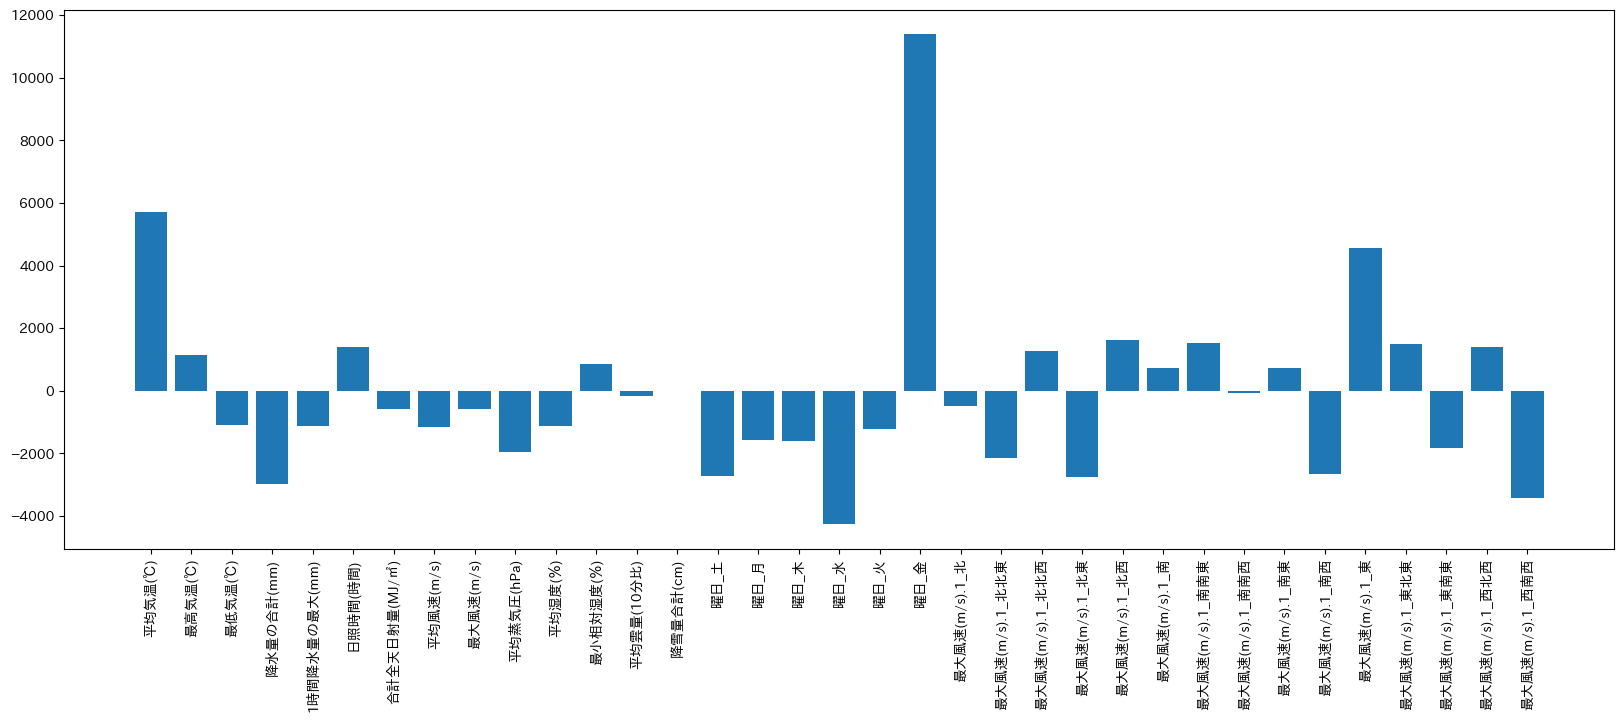

In [ ]:
# パラーメータの重みの大きさをヒストグラムに表示
plt.figure(figsize=(20, 7))
plt.bar(x=X_train.columns, height=lr_res.coef_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 予測値を計算
y_pred = lr_res.predict(X_test)

In [ ]:
for i in range(10):
  print(f"予測値:{y_pred[i]}")
  print(f"目標値:{y_test.iloc[i]}")
  print("--------------------------")

予測値:24519.17991347512
目標値:39500
--------------------------
予測値:35907.24687067926
目標値:21600
--------------------------
予測値:5936.7043347944855
目標値:7600
--------------------------
予測値:16191.261888917981
目標値:22300
--------------------------
予測値:17511.10307635022
目標値:10700
--------------------------
予測値:23884.880369228926
目標値:27500
--------------------------
予測値:2626.756187354873
目標値:5800
--------------------------
予測値:18946.52576354958
目標値:20500
--------------------------
予測値:11285.992711887593
目標値:8500
--------------------------
予測値:20350.732553750604
目標値:19300
--------------------------


In [ ]:
# 学習用データセットとテスト用データセットの精度を検証する
# .score()メソッドを使うと決定係数を算出できる

print(f"学習用データの決定係数: {lr_res.score(X_train, y_train):.3f}")
print(f"テスト用データセットの決定係数: {lr_res.score(X_test, y_test):.3f}")

学習用データの決定係数: 0.582
テスト用データセットの決定係数: 0.595


In [ ]:
# MSE, MAEによる評価
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"平均二乗誤差（MSE）: {mse:.2f}")
print(f"平均絶対誤差（MAE）: {mae:.2f}")

平均二乗誤差（MSE）: 52266517.95
平均絶対誤差（MAE）: 5538.14


In [ ]:
relative_error = mae / y_test.mean()

In [ ]:
relative_error

np.float64(0.24943025998167115)

In [ ]:
coefs = lr_res.coef_
columns = X_train.columns

coef_df = pd.DataFrame({
    'feature': columns,
    'coefficient': coefs,
    'abs_coefficient': np.abs(coefs)
})

smallest_3 = coef_df.sort_values(by='abs_coefficient').head(5)
print(smallest_3)

            feature   coefficient  abs_coefficient
13        降雪量合計(cm)  2.728484e-12     2.728484e-12
27  最大風速(m/s).1_南南西 -7.522439e+01     7.522439e+01
12       平均雲量(10分比) -1.546150e+02     1.546150e+02
20    最大風速(m/s).1_北 -5.010681e+02     5.010681e+02
8         最大風速(m/s) -5.683161e+02     5.683161e+02


In [ ]:
X2 = pd.concat([df.iloc[:, 1], df.iloc[:, 17:23],df.iloc[:, 24:26], df.iloc[:, 27:30]], axis=1)
X2.head()

,曜日,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％)
0,月,14.6,19.7,11.8,3.0,2.5,3.8,2.8,6.3,11.9,73.0,53.0
1,火,14.2,20.6,8.4,0.0,0.0,10.6,3.0,6.1,8.2,50.0,27.0
2,水,13.9,16.6,12.3,11.5,3.0,0.0,1.6,3.9,13.0,83.0,57.0
3,木,15.4,19.9,11.3,4.0,3.5,0.1,2.0,4.7,13.6,79.0,51.0
4,金,11.4,15.1,9.0,0.5,0.5,0.0,2.8,4.9,9.6,71.0,47.0


In [ ]:
X2.shape

(314, 12)

In [ ]:
X2 = pd.get_dummies(X2, columns=[X2.columns[0]], dtype=int)

In [ ]:
# データセットを分割するための関数をインポート
from sklearn.model_selection import train_test_split

# データセットを「学習用データセット」と「テスト用データセット」に分割
X2_train, X2_test = train_test_split(X2, test_size=0.2, random_state=1)

In [ ]:
X2_train.head()

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),曜日_土,曜日_月,曜日_木,曜日_水,曜日_火,曜日_金
0,14.6,19.7,11.8,3.0,2.5,3.8,2.8,6.3,11.9,73.0,53.0,0,1,0,0,0,0
161,21.3,24.5,18.9,9.5,2.5,0.0,2.5,4.9,23.9,94.0,82.0,1,0,0,0,0,0
199,9.7,13.2,7.3,0.0,0.0,8.4,3.2,5.7,5.8,48.0,36.0,0,0,0,0,1,0
62,24.6,30.1,20.0,0.0,0.0,10.4,3.1,5.8,22.4,74.0,48.0,0,0,0,1,0,0
125,29.4,34.4,25.4,1.0,1.0,7.9,3.2,6.4,32.7,80.0,62.0,1,0,0,0,0,0


In [ ]:
X2.dtypes

,0
平均気温(℃),float64
最高気温(℃),float64
最低気温(℃),float64
降水量の合計(mm),float64
1時間降水量の最大(mm),float64
日照時間(時間),float64
平均風速(m/s),float64
最大風速(m/s),float64
平均蒸気圧(hPa),float64
平均湿度(％),float64


In [ ]:
X2_train.shape

(251, 17)

In [ ]:
float_cols2 = X2.select_dtypes(include='float64').columns

In [ ]:
X2_train[float_cols2] = scaler.fit_transform(X2_train[float_cols2])
X2_test[float_cols2] = scaler.fit_transform(X2_test[float_cols2])

In [ ]:
X2_train.head()

,平均気温(℃),最高気温(℃),最低気温(℃),降水量の合計(mm),1時間降水量の最大(mm),日照時間(時間),平均風速(m/s),最大風速(m/s),平均蒸気圧(hPa),平均湿度(％),最小相対湿度(％),曜日_土,曜日_月,曜日_木,曜日_水,曜日_火,曜日_金
0,-0.369581,-0.319189,-0.234906,-0.133149,0.106422,-0.526264,0.133575,0.315840,-0.467298,0.275710,0.298777,0,1,0,0,0,0
161,0.420258,0.246672,0.570764,0.312457,0.106422,-1.503774,-0.253278,-0.543851,0.736828,1.588509,2.012566,1,0,0,0,0,0
199,-0.947224,-1.085460,-0.745543,-0.338814,-0.357327,0.657036,0.649379,-0.052599,-1.079396,-1.287146,-0.705858,0,0,0,0,1,0
62,0.809283,0.906844,0.695587,-0.338814,-0.357327,1.171515,0.520428,0.008807,0.586312,0.338224,0.003296,0,0,0,1,0,0
125,1.375137,1.413761,1.308350,-0.270259,-0.171827,0.528417,0.649379,0.377246,1.619854,0.713310,0.830643,1,0,0,0,0,0


In [ ]:
lr_res2 = lr.fit(X2_train, y_train)

In [ ]:
lr_res2.coef_

array([ 6103.54159587,  -791.69962356,  -163.04515049, -3015.87481963,
       -1077.3788627 ,  1826.0485873 , -1779.91767327,   -64.65096874,
       -2013.31158359, -1357.54714823,  1590.9717915 , -2590.33790642,
       -1145.38485687, -1659.49524314, -4472.28559513, -1241.44298036,
       11108.94658193])

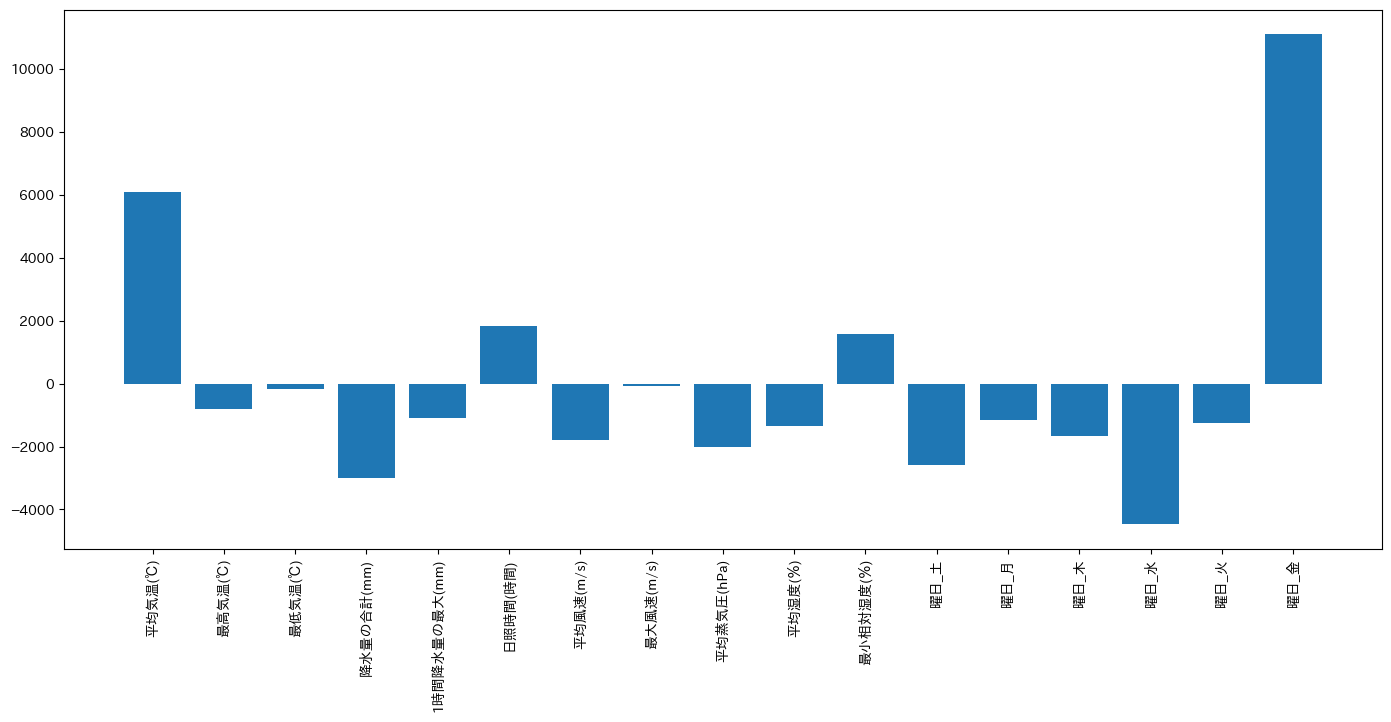

In [ ]:
# パラーメータの重みの大きさをヒストグラムに表示
plt.figure(figsize=(17, 7))
plt.bar(x=X2_train.columns, height=lr_res2.coef_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 予測値を計算
y2_pred = lr_res2.predict(X2_test)

In [ ]:
print(f"学習用データの決定係数: {lr_res2.score(X2_train, y_train):.3f}")
print(f"テスト用データセットの決定係数: {lr_res2.score(X2_test, y_test):.3f}")

学習用データの決定係数: 0.562
テスト用データセットの決定係数: 0.606


In [ ]:
# MSE, MAEによる評価
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse2 = mean_squared_error(y_test, y2_pred)
mae2 = mean_absolute_error(y_test, y2_pred)

print(f"平均二乗誤差（MSE）: {mse2:.2f}")
print(f"平均絶対誤差（MAE）: {mae2:.2f}")

平均二乗誤差（MSE）: 50801186.16
平均絶対誤差（MAE）: 5385.22


In [ ]:
relative_error = mae2 / y_test.mean()

In [ ]:
relative_error

np.float64(0.2425428805491441)

In [133]:
# Lassoモデルをインポート
from sklearn.linear_model import Lasso

In [138]:
lasso_reg = Lasso(alpha=0.03)

In [139]:
lasso_reg_res = lasso_reg.fit(X2_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.400e+09, tolerance: 2.497e+06
  model = cd_fast.enet_coordinate_descent(


In [140]:
# 学習用データセットとテスト用データセットの精度を検証する

print(f"学習用データの決定係数: {lasso_reg_res.score(X2_train, y_train):.3f}")
print(f"テスト用データセットの決定係数: {lasso_reg_res.score(X2_test, y_test):.3f}")

学習用データの決定係数: 0.562
テスト用データセットの決定係数: 0.606


In [142]:
lasso_reg_res.coef_

array([ 6046.20766257,  -761.79578492,  -135.31425485, -3016.13575851,
       -1077.25985761,  1825.86874286, -1779.89648002,   -64.46498547,
       -2013.65079894, -1357.41382658,  1591.85247838, -4054.53783895,
       -2610.41750998, -3124.01290765, -5936.78825948, -2705.25368475,
        9645.44426399])

In [141]:
df['profit_lag1'] = df['profit'].shift(1)
df['profit_lag2'] = df['profit'].shift(2)

TypeError: RegressorMixin.score() missing 1 required positional argument: 'y'

In [ ]:
X2 = pd.concat([df.iloc[:, 1], df.iloc[:, 17:23],, df.iloc[:, 17:23]df.iloc[:, 24:26], df.iloc[:, 27:30]], axis=1)
X2.head()